In [16]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### read all climatological data

In [17]:
ds = xr.open_mfdataset("clim_kpar_GMAO2022_*.nc")

In [19]:
ds

<xarray.Dataset>
Dimensions:  (time: 12, lat: 720, lon: 1440)
Coordinates:
  * time     (time) object 0001-01-15 00:00:00 ... 0001-12-15 00:00:00
  * lat      (lat) float64 -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float64 -179.9 -179.6 -179.4 -179.1 ... 179.4 179.6 179.9
Data variables:
    kPAR     (time, lat, lon) float32 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
Attributes:
    title:        ExtData_for_GEOS-ESM
    institution:  NASA Global Modeling and Assimilation Office
    source:       https://github.com/GEOS-ESM/GMAO_Shared/tree/main/GEOS_Util...
    references:   https://github.com/GEOS-ESM/GMAO_Shared/tree/main/GEOS_Util...
    history:      File created on February 12, 2022, 23:34:16

### Plot all data

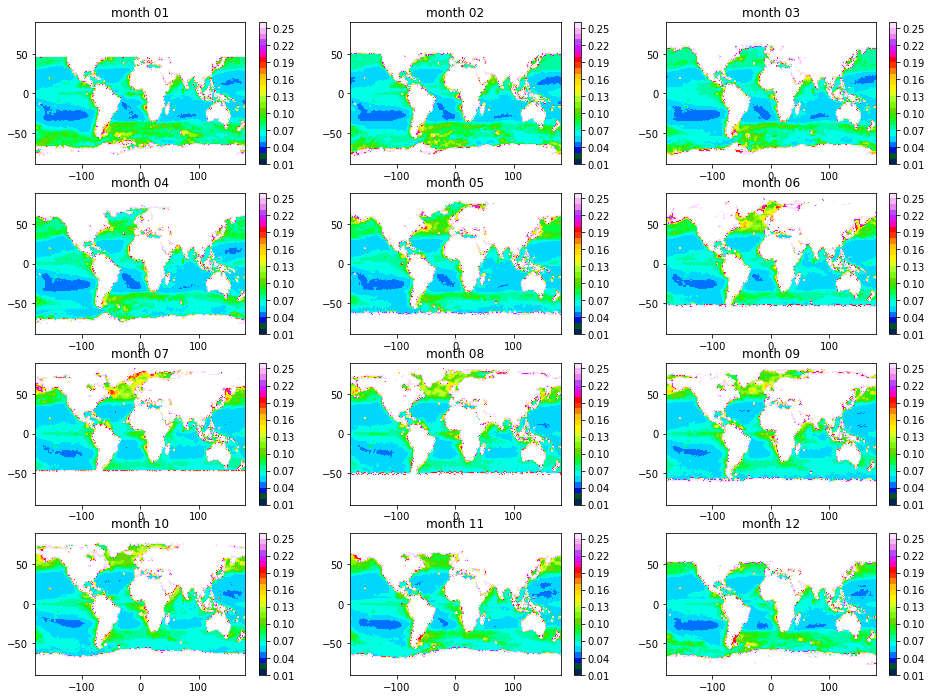

In [23]:
nRec = len(ds.time.values)

plt.figure(figsize=(16,12))

for iRec in range(nRec):
    plt.subplot(4,3,iRec+1)
    plt.contourf(ds.lon, ds.lat, ds.kPAR.isel(time=iRec), np.linspace(0.01, 0.26, 26), cmap=plt.cm.gist_ncar), plt.colorbar()
    plt.title('month %s'%(str(iRec+1).zfill(2)))

### Plot a time-series for a region

Text(0, 0.5, 'kPAR ($m^{-1}$)')

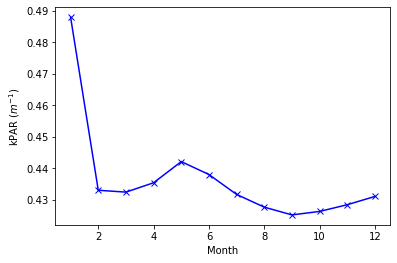

In [28]:
kpar_box = ds.kPAR.sel(lat=slice(30.0, 50.0)).sel(lon=slice(-100, -30)).mean(('lat', 'lon'))
plt.plot(np.arange(1, 13), kpar_box, "b-x")
plt.xlabel('Month')
plt.ylabel(r'kPAR ($m^{-1}$)')